In [1]:
# tyler: countries education rate vs malnutrition rate AND 
# countries education rate vs fertility (# of children per woman)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
edu_df = pd.read_csv('Clean Education.csv')
nut_df = pd.read_csv('Clean School Aged Nutrition.csv')
demog_df = pd.read_csv('Cleaned Demographics.csv')

In [3]:
# merge
tylerData1 = pd.merge(edu_df, nut_df)
tylerDataComplete = pd.merge(tylerData1, demog_df)

# print column names to identify the required ones
tylerDataComplete.columns

Index(['countries and areas',
       '"Out-of-school rate 2012–2018*" One year before primary entry age, male',
       '"Out-of-school rate 2012–2018*" One year before primary entry age, female',
       'Out-of-school rate 2012–2018, Primary education, male',
       'Out-of-school rate 2012–2018, Primary education, female',
       'Out-of-school rate 2012–2018, Lower secondary education, male',
       'Out-of-school rate 2012–2018, Lower secondary education, female',
       'Out-of-school rate 2012–2018, male',
       'Out-of-school rate 2012–2018, female',
       'Completion rate 2012–2018, Primary education, male',
       'Completion rate 2012–2018, Primary education, female',
       'Completion rate 2012–2018, Lower secondary education, male',
       'Completion rate 2012–2018, Lower secondary education, female',
       'Completion rate 2012–2018, Upper secondary education, male',
       'Completion rate 2012–2018, Upper secondary education, female',
       'Learning outcomes 2010–2

In [4]:
# remove "-"s
tylerDataComplete['Total fertility  (live births per woman) 2018'] = tylerDataComplete['Total fertility  (live births per woman) 2018'].apply(lambda x: x.replace('−',''))
tylerDataComplete['Completion rate 2012–2018, Upper secondary education, male'] = tylerDataComplete['Completion rate 2012–2018, Upper secondary education, male'].apply(lambda x: x.replace('−',''))
tylerDataComplete['Completion rate 2012–2018, Upper secondary education, female'] = tylerDataComplete['Completion rate 2012–2018, Upper secondary education, female'].apply(lambda x: x.replace('-',''))

# choose specific columns
tylerDataSpecific = tylerDataComplete.iloc[:, [13, 14, 23, 41]]

# save data frame as csv so we can remove NAs
tylerDataSpecific.to_csv("Education and Fertility.csv", encoding='utf-8', index=False)

# import merged and cleaned data
tylerDS = pd.read_csv("Education and Fertility.csv")

#drop blank rows
tylerDS = tylerDS.dropna(how="any")

# print new data
tylerDS

,"Completion rate 2012–2018, Upper secondary education, male","Completion rate 2012–2018, Upper secondary education, female",Malnutrition among preschool-aged children (0–4 years of age) 2013–2018*: Stunted (%) (moderate and severe): all children,Total fertility (live births per woman) 2018
0,32.0,14,41,4.5
1,43.0,60,11,1.6
2,30.0,47,12,3.0
4,21.0,15,38,5.5
7,53.0,66,8,2.3
...,...,...,...,...
194,45.0,28,11,2.0
198,50.0,61,25,2.0
199,37.0,23,46,3.8
200,34.0,23,40,4.6


In [5]:
# identify variables for easier plotting
male = tylerDS['Completion rate 2012–2018, Upper secondary education, male']
female = tylerDS['Completion rate 2012–2018, Upper secondary education, female'].astype(float)
fertility = tylerDS['Total fertility  (live births per woman) 2018']
malnutrition = tylerDS['Malnutrition among preschool-aged children (0–4 years of age) 2013–2018*: Stunted (%) (moderate and severe): all children'].astype(float)

The r-squared is: -0.6179415030423938


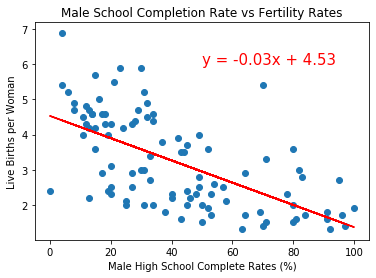

In [6]:
# scatter plot of male complete rate vs fertility rates
(slope, intercept, rvalue, pvalue, stderr) = linregress(male,fertility)
regress_values = male * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(male, fertility)
plt.plot(male,regress_values,"r-")
plt.annotate(line_eq,(50,6),fontsize=15,color="red")
plt.title("Male School Completion Rate vs Fertility Rates")
plt.xlabel("Male High School Complete Rates (%)")
plt.ylabel("Live Births per Woman")
print(f"The r-squared is: {rvalue}")
plt.savefig("male rate vs fertility")

The r-squared is: -0.6962572022487052


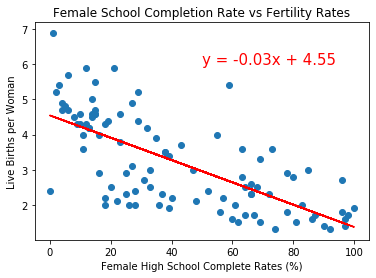

In [7]:
# scatter plot of female complete rate vs fertility rates
(slope, intercept, rvalue, pvalue, stderr) = linregress(female, fertility)
regress_values = female * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(female, fertility)
plt.plot(female,regress_values,"r-")
plt.annotate(line_eq,(50,6),fontsize=15,color="red")
plt.title("Female School Completion Rate vs Fertility Rates")
plt.xlabel("Female High School Complete Rates (%)")
plt.ylabel("Live Births per Woman")
print(f"The r-squared is: {rvalue}")
plt.savefig("female rate vs fertility")

The r-squared is: -0.5277379102324901


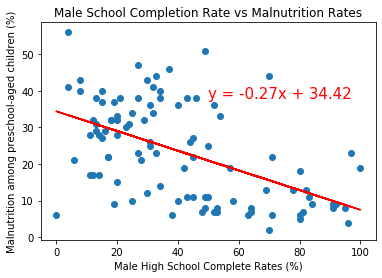

In [8]:
# scatter plot of male complete rate vs malnutrition
(slope, intercept, rvalue, pvalue, stderr) = linregress(male,malnutrition)
regress_values = male * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(male, malnutrition)
plt.plot(male,regress_values,"r-")
plt.annotate(line_eq,(50,38),fontsize=15,color="red")
plt.title("Male School Completion Rate vs Malnutrition Rates")
plt.xlabel("Male High School Complete Rates (%)")
plt.ylabel("Malnutrition among preschool-aged children (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("male rate vs malnutrition")

The r-squared is: -0.6288847171083061


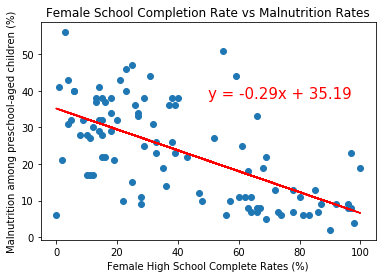

In [9]:
# scatter plot of female complete rate vs malnutrition
(slope, intercept, rvalue, pvalue, stderr) = linregress(female,malnutrition)
regress_values = female * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(female, malnutrition)
plt.plot(female,regress_values,"r-")
plt.annotate(line_eq,(50,38),fontsize=15,color="red")
plt.title("Female School Completion Rate vs Malnutrition Rates")
plt.xlabel("Female High School Complete Rates (%)")
plt.ylabel("Malnutrition among preschool-aged children (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("female rate vs malnutrition")